In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0'

In [3]:
import numpy as np
import pandas as pd

In [2]:
keras.__version__

'2.3.0-tf'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
y_train_full.shape

(60000,)

In [11]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
#梯度下降训练神经网络，必须要对输入特征进行缩放
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

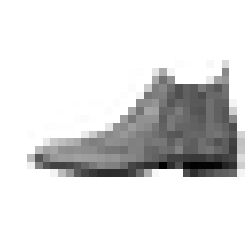

In [29]:
plot_digit(X_test[0])

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense')

In [21]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[-0.00358707, -0.01927349, -0.04717771, ..., -0.03803562,
        -0.02494682,  0.02335989],
       [ 0.00765259, -0.05748503, -0.01732587, ...,  0.01473098,
         0.03866412, -0.01609075],
       [ 0.00836433,  0.05978332,  0.0353161 , ...,  0.01797194,
        -0.02626731,  0.04457383],
       ...,
       [-0.00572047, -0.06671125,  0.06176782, ...,  0.03309449,
         0.01307972,  0.06975734],
       [ 0.03417611,  0.03663995,  0.04352098, ..., -0.03629566,
         0.0136682 , -0.01832418],
       [-0.03666372, -0.06137844, -0.04198727, ..., -0.03888833,
        -0.05471255, -0.06686991]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30,
...                     validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7005 - accuracy: 0.7718 - val_loss: 0.4905 - val_accuracy: 0.8384
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4836 - accuracy: 0.8317 - val_loss: 0.4537 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8461 - val_loss: 0.4354 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4116 - accuracy: 0.8565 - val_loss: 0.3956 - val_accuracy: 0.8648 0.4129 - accuracy: 
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3925 - accuracy: 0.8623 - val_loss: 0.3817 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8672 - val_loss: 0.4249 - val_accuracy: 0.8530
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3649 - accuracy: 0.8705 - val_loss: 0.

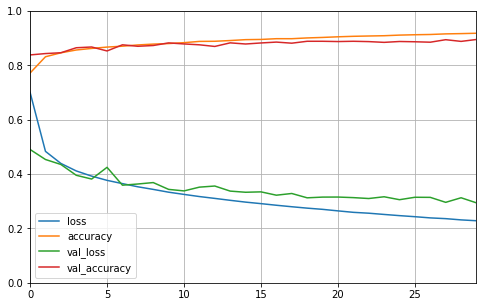

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
#当对验证准确率达到满意之后，就可以用测试集评估泛化误差
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 926us/step - loss: 67.6553 - accuracy: 0.8411


[67.6552963256836, 0.8410999774932861]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 783us/step - loss: 0.7893 - val_loss: 6.6178
Epoch 2/20
363/363 [==============================] - 0s 692us/step - loss: 1.7220 - val_loss: 0.4647
Epoch 3/20
363/363 [==============================] - 0s 695us/step - loss: 0.4410 - val_loss: 0.4304
Epoch 4/20
363/363 [==============================] - 0s 698us/step - loss: 0.4116 - val_loss: 0.4315
Epoch 5/20
363/363 [==============================] - 0s 695us/step - loss: 0.3991 - val_loss: 0.3978
Epoch 6/20
363/363 [==============================] - 0s 696us/step - loss: 0.3980 - val_loss: 0.4332
Epoch 7/20
363/363 [==============================] - 0s 692us/step - loss: 0.4180 - val_loss: 0.4126
Epoch 8/20
363/363 [==============================] - 0s 698us/step - loss: 0.3883 - val_loss: 0.4149
Epoch 9/20
363/363 [==============================] - 0s 695us/step - loss: 0.3826 - val_loss: 0.3884
Epoch 10/20
363/363 [==============================] - 0s 692us/step - loss: 0.375

In [8]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [9]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1972 - val_loss: 0.9010
Epoch 2/20
363/363 [==============================] - 0s 772us/step - loss: 0.7676 - val_loss: 0.6913
Epoch 3/20
363/363 [==============================] - 0s 765us/step - loss: 0.6589 - val_loss: 0.6305
Epoch 4/20
363/363 [==============================] - 0s 767us/step - loss: 0.6160 - val_loss: 0.5961
Epoch 5/20
363/363 [==============================] - 0s 756us/step - loss: 0.5904 - val_loss: 0.5736
Epoch 6/20
363/363 [==============================] - 0s 780us/step - loss: 0.5704 - val_loss: 0.5561
Epoch 7/20
363/363 [==============================] - 0s 767us/step - loss: 0.5552 - val_loss: 0.5418
Epoch 8/20
363/363 [==============================] - 0s 764us/step - loss: 0.5415 - val_loss: 0.5300
Epoch 9/20
363/363 [==============================] - 0s 769us/step - loss: 0.5305 - val_loss: 0.5199
Epoch 10/20
363/363 [==============================] - 0s 767us/step - loss: 0.5194 

In [ ]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

In [10]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-07-25 10:25:07.025094: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-07-25 10:25:07.025204: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "c:\users\wei\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\wei\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\wei\AppData\Local\Programs\Python\Python36\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "c:\users\wei\appdata\local\programs\python\python36\lib\site-packages\tensorboard\main.py", line 65, in run_main
    default.get_plugins() + default.get_dynamic_plugins()